In [1]:
#sgillen: implementation of trajectory optimization using the five link walker


# jupyter magic 
#==============================================================================

#%load_ext line_profiler

#%lprun -f __main__ __main__()


# imports
#==============================================================================

import math
import numpy as np
import matplotlib.pyplot as plt

from pydrake.all import (BasicVector, DiagramBuilder, FloatingBaseType,
                         Simulator,SignalLogger, Isometry3, DirectCollocation, 
                         PiecewisePolynomial, AddMultibodyPlantSceneGraph)

from pydrake.solvers.mathematicalprogram import Solve

from pydrake.multibody.parsing import Parser
from pydrake.multibody.plant import MultibodyPlant

#from pydrake.all import 
from underactuated import (FindResource, PlanarSceneGraphVisualizer)

from IPython.display import HTML

#this one is home grown, make sure it's in the same directory as this notebook
from seagul.drake import x_expr,y_expr,x_float,y_float,x_taylor,y_taylor
from seagul.resources import getResourcePath 

from numpy import pi

In [2]:
#load the walker 
plant = MultibodyPlant()
parser = Parser(plant)
parser.AddModelFromFile(getResourcePath() + "/five_link.urdf")
plant.Finalize()
context = plant.CreateDefaultContext()

SystemExit: Failure at bazel-out/k8-py2-opt/bin/systems/framework/_virtual_includes/vector/drake/systems/framework/vector_base.h:93 in SetFromVector(): condition 'value.rows() == size()' failed.

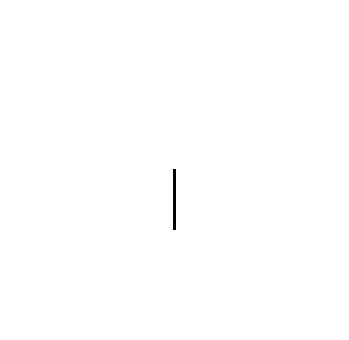

In [3]:
#load the walker 
builder = DiagramBuilder()
plant, scene_graph = AddMultibodyPlantSceneGraph(builder)
parser = Parser(plant, scene_graph)
parser.AddAllModelsFromFile(getResourcePath() + "/five_link.urdf")
plant.Finalize()

builder.ExportInput(plant.get_actuation_input_port())
visualizer = builder.AddSystem(PlanarSceneGraphVisualizer(scene_graph, xlim=[-2.8, 2.8], ylim=[-2.8, 2.8]))
context = plant.CreateDefaultContext()
                                                       
builder.Connect(scene_graph.get_pose_bundle_output_port(), visualizer.get_input_port(0))
diagram = builder.Build()

simulator = Simulator(diagram)
simulator.set_target_realtime_rate(1.0)

context = simulator.get_mutable_context()
context.SetContinuousState([0. for _ in range(8)])
context.FixInputPort(0, [0.0, 0.0, 0.0, 0.0])  # Zero input torques

simulator.StepTo(10)